In [17]:
#from sklearn.svm import OneClassSVM
#from sklearn import preprocessing
# ---> https://www.kaggle.com/mahdishirmohammadi/heart-disease-binary-classification

# Data science and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
# dataset => https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset
print("Data Shape:", df.shape)

Data Shape: (253680, 22)


In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
HeartDiseaseorAttack    253680 non-null float64
HighBP                  253680 non-null float64
HighChol                253680 non-null float64
CholCheck               253680 non-null float64
BMI                     253680 non-null float64
Smoker                  253680 non-null float64
Stroke                  253680 non-null float64
Diabetes                253680 non-null float64
PhysActivity            253680 non-null float64
Fruits                  253680 non-null float64
Veggies                 253680 non-null float64
HvyAlcoholConsump       253680 non-null float64
AnyHealthcare           253680 non-null float64
NoDocbcCost             253680 non-null float64
GenHlth                 253680 non-null float64
MentHlth                253680 non-null float64
PhysHlth                253680 non-null float64
DiffWalk                253680 non-null float64
Sex                     2

## Feature Information
- HeartDiseaseorAttack
- HighBP 
- HighChol
- CholCheck
- BMI
- Smoker
- Stroke
- Diabetes
- PhysActivity
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- GenHlth
- MentHlth
- PhysHlth 
- DiffWalk
- Sex
- Age
- Education
- Income

In [6]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 01. 데이터 파악하기

In [7]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# 심장병 여부 ==> 'HeartDiseaseorAttack' 컬럼
print("Values are: ", df.HeartDiseaseorAttack.unique())
print("Value Counts: ")
print(df.HeartDiseaseorAttack.value_counts())

Values are:  [0. 1.]
Value Counts: 
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


In [10]:
# 심장병 여부(y/n)별 비중
df.HeartDiseaseorAttack.value_counts() / len(df)*100

0.0    90.581441
1.0     9.418559
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
# pearson 상관관계 
df.corr()

(22.5, 0.0)

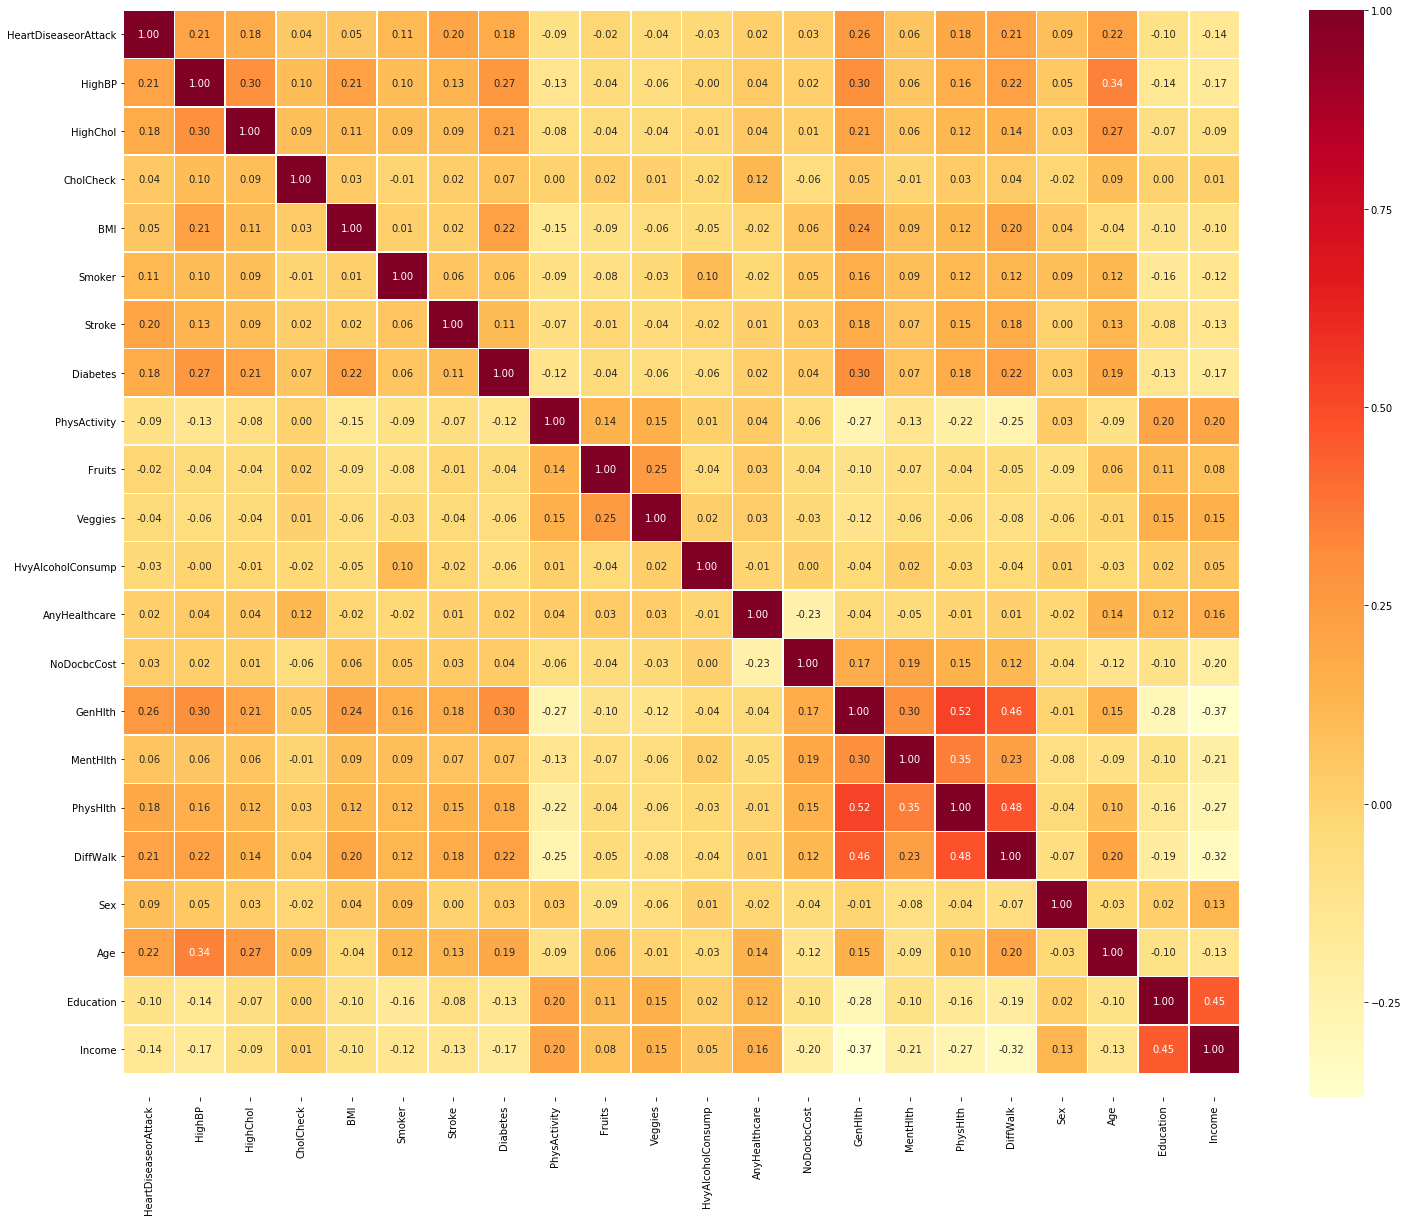

In [12]:
# 시각화 관련 source =>  https://dsbook.tistory.com/52?category=780539
# heatmap color guide => https://matplotlib.org/stable/tutorials/colors/colormaps.html
# heatmap 관련 documentation => https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

## 02. 데이터 전처리

In [13]:
X = df[df.columns[:-1]]
y = df['HeartDiseaseorAttack']

In [14]:
# scaler = preprocessing.StandardScaler().fit(X)
# X_scaled = scaler.transform(X)

In [15]:
# # 이상치 확인 및 처리하기
# clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
# outlier = clf.predict(X_scaled)
# pd.Series(clf.predict(X_scaled)).value_counts()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Logidtic Regression, KNN, Random Forest 모델 적용
models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

In [20]:
def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    """
    A function to fit and evaluate the specified ML models
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)
model_scores